# Weather Changes Over Time (Consuming APIs)

## Task
Utilize the following two APIs to evaluate the changes in temperature for your birthday and city you were born in:
* [geocode.xyz](geocode.xyz)
* [open-meteo.com](open-meteo.com)


In [32]:
from datetime import date, datetime, timedelta

import requests
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

sns.set_palette('muted')
sns.set_style('white')

In [7]:
auth_geocode = '632159905187275925121x13204'

## Question 1: Geocoding A Location
Write a function that utilizes the [geocode.xyz](geocode.xyz) API to take in a city and country and return the latitude and longitude of that location

```
def geocode_location(city, country):
    # your code
    return latitude, longitude
```

For example:
```
geocode_location("london", "united kingdom")
```
should return
```
(-0.11534, 51.49742)
```

In [16]:
# Create API link to call to site adding search and auth code needed for api call
api = (f'https://geocode.xyz/Ann+Arbor,United+States?json=1&auth={auth_geocode}')
# calling API to get a response should get something like a 200 
resp = requests.get(api)
# asking for type of response. comes as requests.models.response with type(resp)
# type(resp)
# turn call to variable
api_dict = resp.json()
# return tuple of data called in API
api_dict['latt'], api_dict['longt']

('42.27508', '-83.74282')

In [21]:
# write your solution here
def geocode_location(city, country):
    api = f'https://geocode.xyz/{city},{country}?json=1&auth={auth_geocode}'
    resp = requests.get(api)
    api_dict = resp.json()
    return api_dict['latt'], api_dict['longt']

latt, longt = geocode_location(city = 'Ann+Arbor', country = 'United+States')
print(f'Latitude: {latt}, Longitude: {longt}')

Latitude: 42.27508, Longitude: -83.74282


## Question 2: Determining Weather Using Date and Location
Write a function that utilizes the [open-meteo.com](https://open-meteo.com/) API to take in a date and location and return the 15-day average high and low for the following measurements from the years 1960 to 2022:
* `precipitation_sum` (mm): Sum of daily precipitation (including rain, showers and snowfall)
* `temperature_2m_max` (°F): Maximum daily air temperature at 2 meters above ground
* `temperature_2m_min` (°F): Minimum daily air temperature at 2 meters above ground
* `apparent_temperature_max` (°F): Maximum daily apparent temperature
* `apparent_temperature_min` (°F): Min daily apparent temperature

The function should return the above measurements in a dictionary object with the keys being `"precipitation_sum"`, `"temperature_2m_max"`, etc. and the values being the 15-day average of the measurements. The 15-day average should be the 7 days preceeding the input date, the input date, and the 7 days following the input date. This will give the results more statistical validity by increasing the number of samples for each measurement.

The `get_historical_weather_measurements()` function will include a few different sub-tasks:

### Create API Request in Postman/Insomnia
Use the following [API Documentation](https://open-meteo.com/en/docs/historical-weather-api#api-documentation) page to create an API request that responds with a JSON object of the measurements listed above. Make sure the response object meets the following:
* Temperatue measurements are in Fahrenheit
* Precipitation measurements are in inches
* Measurements are daily aggregations
* 15 day range of weather
* JSON format


Before writing any code, use Postman/Insomnia to create the API request and take a screenshot of the request/response.

### Create API Request Function
Convert the request above into a function. The function should take in `latitude`, `longitude`, and `date` as its arguments and return the API response, if successful.

```
def get_api_response(latitude, longitude, date):
    # your code

```

Use the helper function below for creating a 15-day date range 

In [83]:
def get_historical_weather_measurements(target_date):
    '''target date is a string in the form of (MM/DD/YYYY);
    Will be converted to (YYYY/MM/DD) format'''
    #historical_url = ‘https://open-meteo.com/en/docs/historical-weather-api’
    h_url = 'https://archive-api.open-meteo.com/v1/archive'
    #https://open-meteo.com/en/docs/historical-weather-api
    #start_date=2023-11-04&end_date=2023-11-11
    # &daily=apparent_temperature_max,apparent_temperature_min
    # &timezone=America%2FNew_York
    target_datetime = datetime.strptime(target_date, f'%m-%d-%Y')
    end_datetime = target_datetime + timedelta(days = 7)
    start_datetime = target_datetime + timedelta(days = -7)
    end_date = end_datetime.strftime('%Y-%m-%d')
    start_date = start_datetime.strftime('%Y-%m-%d')
    params = {
        'latitude': f'{latt}',
        'longitude': f'{longt}',
        'start_date': f'{start_date}',
        'end_date': f'{end_date}',
        'daily': ['precipitation_sum', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max', 'apparent_temperature_min'],
        'timezone': 'America/New_York'
    }
    json_response = requests.get(h_url, params = params).json()
    return json_response['daily']
   # return json_response
dict_historicals = get_historical_weather_measurements(target_date='10-01-2023')
df = pd.DataFrame.from_dict(dict_historicals)
df.head(n=17)

,time,precipitation_sum,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min
0,2023-09-24,0.0,24.5,11.1,24.1,9.2
1,2023-09-25,12.1,18.9,15.6,19.0,14.9
2,2023-09-26,3.9,20.8,13.6,21.0,13.9
3,2023-09-27,7.4,18.8,14.3,17.6,13.5
4,2023-09-28,5.0,19.7,14.1,19.6,13.3
5,2023-09-29,0.5,21.1,14.2,22.2,14.5
6,2023-09-30,0.0,23.0,11.9,23.9,12.0
7,2023-10-01,0.0,24.2,12.1,25.7,11.9
8,2023-10-02,0.0,25.7,13.4,27.0,13.2
9,2023-10-03,0.0,27.5,13.8,28.4,13.2


### if date is in the future predict weather from todays date to future date

In [34]:
my_date = '11-13-2023'
dt = datetime.strptime(my_date, '%m-%d-%Y')
dt.strftime('%Y-%m-%d')

'2023-11-13'

In [40]:
datetime.today()+timedelta(days=-7)

datetime.datetime(2023, 11, 6, 11, 39, 43, 236341)

In [2]:
# helper function for 15-day date range
def get_date_range(birthday):
    return {'start_date': birthday - timedelta(days=7),
            'end_date': birthday + timedelta(days=7)
           }

In [3]:
# write your solution here
def get_api_response(latitude, longitude, date):
    pass # remove this line once you start adding code to your function

### Iterating Over Each Year
Write a function that iterates through each year between 1960 and 2022 and returns the corresponding JSON response objects containing weather data for each year in a python list.

```
def get_all_response_objects(start_year, end_year):
    # your code
```


In [4]:
# write your solution here
def get_all_response_objects(latitude, longitude, date):
    pass # remove this line once you start adding code to your function

### Parse JSON Responses & Aggregate Data
Write a function that takes the list of JSON response objects from the previous function in as a parameter and returns a pandas DataFrame containing the original input date, the measurements, and the average across the 15 days.
```
def parse_json_response(responses):
    # your code
```


In [10]:
# write your solution here
def parse_json_response(responses):
    pass # remove this line once you start adding code to your function

### Combining the Functions
Write a function that combines all the above functions into one, where the user inputs their birthday and location and the function returns the pandas DataFrame containing the summary of measurements.

```
def get_data():
    birthday = get_user_birthday()
    location = get_user_city_of_birth()
    # your code here
```

The helper functions below can be used for birthday and location input information:

In [79]:
# helper functions
def get_user_birthday():
    birthday = input('Enter your birthday (mm-dd-yyyy): ')
    return birthday #datetime.strptime(birthday, "%Y/%m/%d")

def get_user_city_of_birth():
    city = input('Enter the city you were born in: ')
    
    return city

def get_user_country_of_birth():
    country = input('Enter the country you were born in: ')
    return country

In [78]:
# birthday = get_user_birthday()
# birthday
# bcity = get_user_city_of_birth()
# bcountry  = get_user_country_of_birth()
# geocode_location(bcity, bcountry)
    # geocode_location(birthday):
birthday = get_user_birthday()
get_historical_weather_measurements(birthday)

Enter your birthday (YYYY/MM/DD): 04-20-1992


{'time': ['1992-04-13',
  '1992-04-14',
  '1992-04-15',
  '1992-04-16',
  '1992-04-17',
  '1992-04-18',
  '1992-04-19',
  '1992-04-20',
  '1992-04-21',
  '1992-04-22',
  '1992-04-23',
  '1992-04-24',
  '1992-04-25',
  '1992-04-26',
  '1992-04-27'],
 'precipitation_sum': [1.0,
  0.0,
  0.0,
  16.1,
  0.0,
  4.0,
  0.2,
  12.4,
  17.7,
  0.0,
  8.5,
  6.7,
  5.8,
  0.8,
  0.1],
 'temperature_2m_max': [3.6,
  6.6,
  8.6,
  21.4,
  10.8,
  10.4,
  22.5,
  22.7,
  18.9,
  12.5,
  18.2,
  14.1,
  7.6,
  11.9,
  10.7],
 'temperature_2m_min': [-3.1,
  0.2,
  -0.5,
  4.2,
  4.1,
  4.0,
  7.7,
  13.1,
  13.5,
  7.6,
  3.9,
  4.8,
  3.1,
  3.1,
  3.0],
 'apparent_temperature_max': [0.1,
  3.5,
  4.1,
  21.2,
  8.7,
  8.2,
  23.3,
  22.9,
  19.7,
  11.2,
  17.2,
  12.8,
  3.2,
  9.3,
  6.8],
 'apparent_temperature_min': [-7.8,
  -3.2,
  -4.5,
  0.5,
  0.5,
  0.7,
  5.4,
  12.4,
  12.4,
  3.2,
  1.1,
  2.1,
  -0.3,
  -0.4,
  -0.8]}

In [85]:
# write your solution here
def get_data():
    birthday = get_user_birthday()
    bcity = get_user_city_of_birth()
    bcountry  = get_user_country_of_birth()
    geocode_location(bcity, bcountry)
    df = get_historical_weather_measurements(birthday)
    return df
get_data()

Enter your birthday (mm-dd-yyyy): 04-20-1992
Enter the city you were born in: Detroit
Enter the country you were born in: United States


{'time': ['1992-04-13',
  '1992-04-14',
  '1992-04-15',
  '1992-04-16',
  '1992-04-17',
  '1992-04-18',
  '1992-04-19',
  '1992-04-20',
  '1992-04-21',
  '1992-04-22',
  '1992-04-23',
  '1992-04-24',
  '1992-04-25',
  '1992-04-26',
  '1992-04-27'],
 'precipitation_sum': [1.0,
  0.0,
  0.0,
  16.1,
  0.0,
  4.0,
  0.2,
  12.4,
  17.7,
  0.0,
  8.5,
  6.7,
  5.8,
  0.8,
  0.1],
 'temperature_2m_max': [3.6,
  6.6,
  8.6,
  21.4,
  10.8,
  10.4,
  22.5,
  22.7,
  18.9,
  12.5,
  18.2,
  14.1,
  7.6,
  11.9,
  10.7],
 'temperature_2m_min': [-3.1,
  0.2,
  -0.5,
  4.2,
  4.1,
  4.0,
  7.7,
  13.1,
  13.5,
  7.6,
  3.9,
  4.8,
  3.1,
  3.1,
  3.0],
 'apparent_temperature_max': [0.1,
  3.5,
  4.1,
  21.2,
  8.7,
  8.2,
  23.3,
  22.9,
  19.7,
  11.2,
  17.2,
  12.8,
  3.2,
  9.3,
  6.8],
 'apparent_temperature_min': [-7.8,
  -3.2,
  -4.5,
  0.5,
  0.5,
  0.7,
  5.4,
  12.4,
  12.4,
  3.2,
  1.1,
  2.1,
  -0.3,
  -0.4,
  -0.8]}

Run your function and set it equal to `df`:

In [ ]:
df = get_data()

df.head()

## Question 3: Visualizing The Data
Plot the DataFrame using `matplotlib`/`seaborn` and write a short summary of your results.

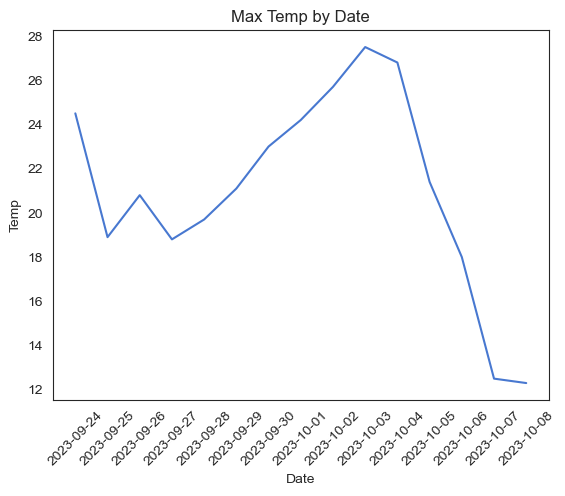

In [96]:
max_temp = df['temperature_2m_max']
max_temp
date = df['time']
date

plt.plot(date, max_temp)
plt.title('Max Temp by Date')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.xticks(rotation=45)
plt.show()

### Results Summary:

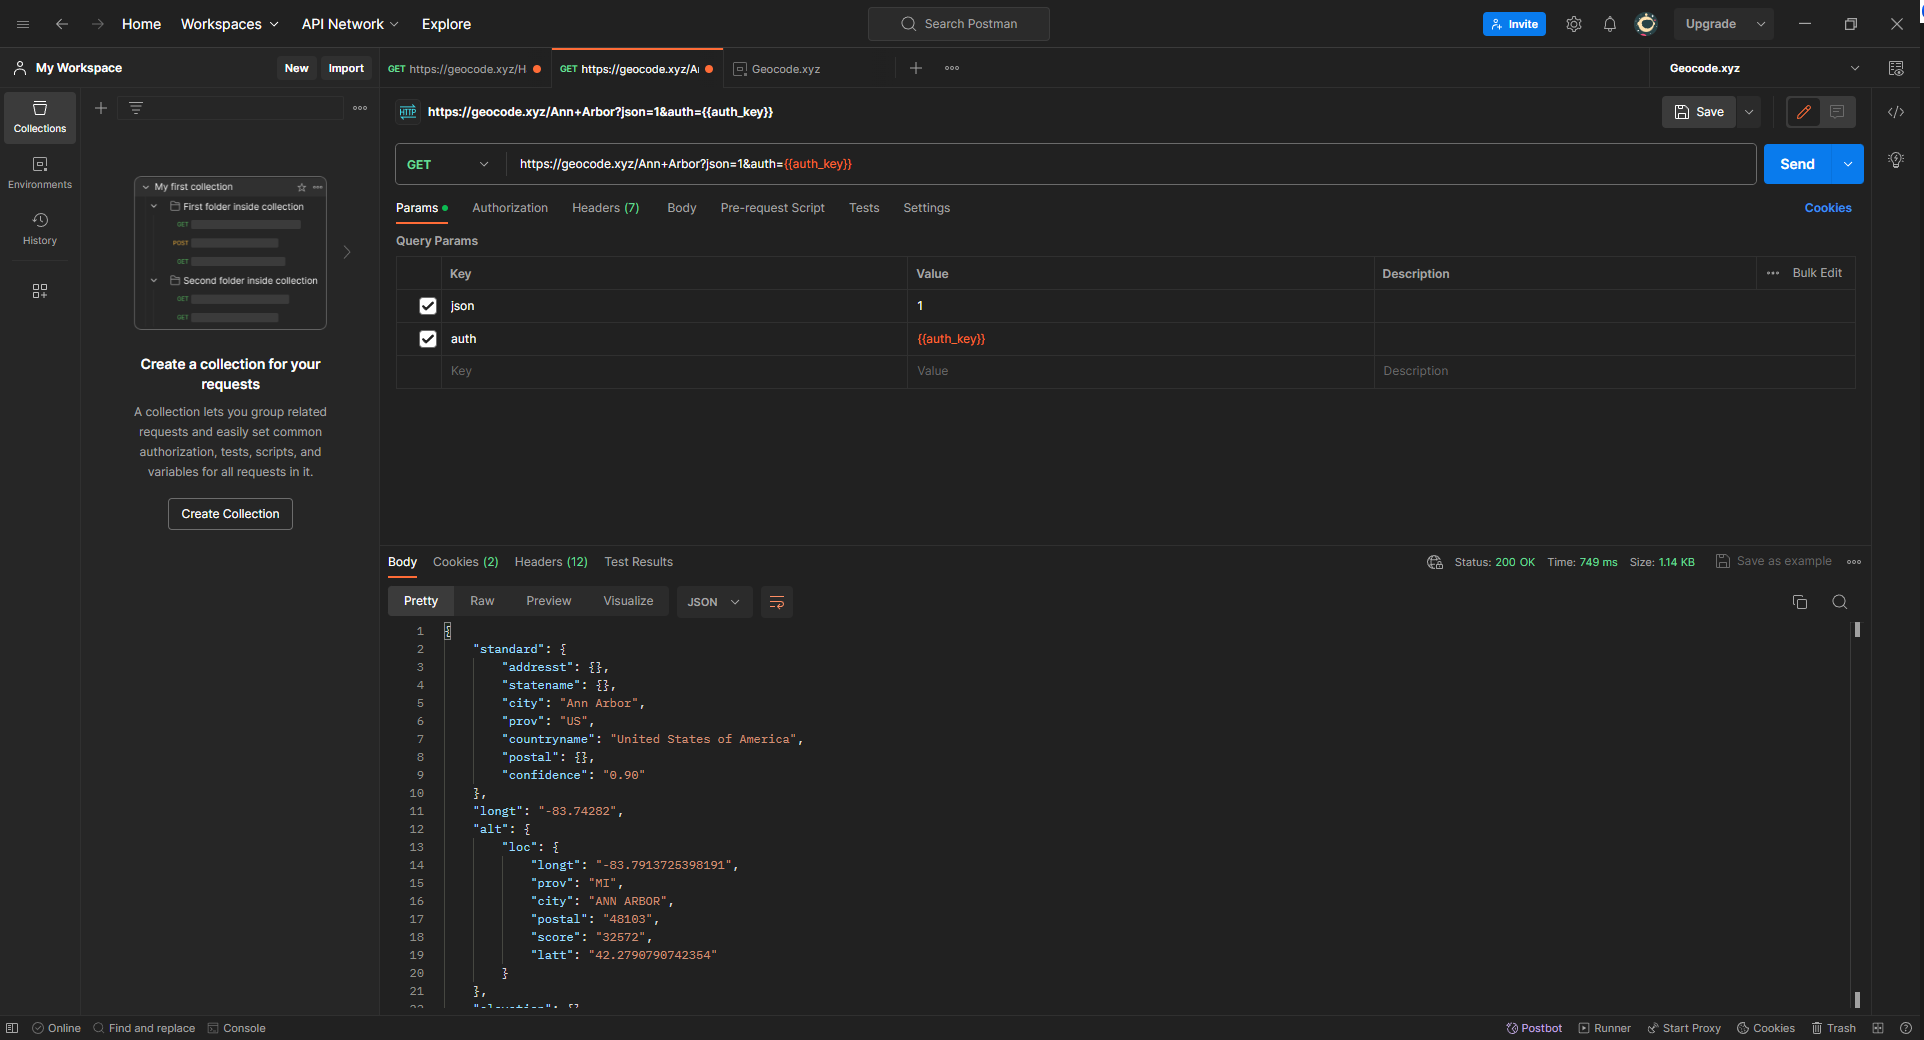

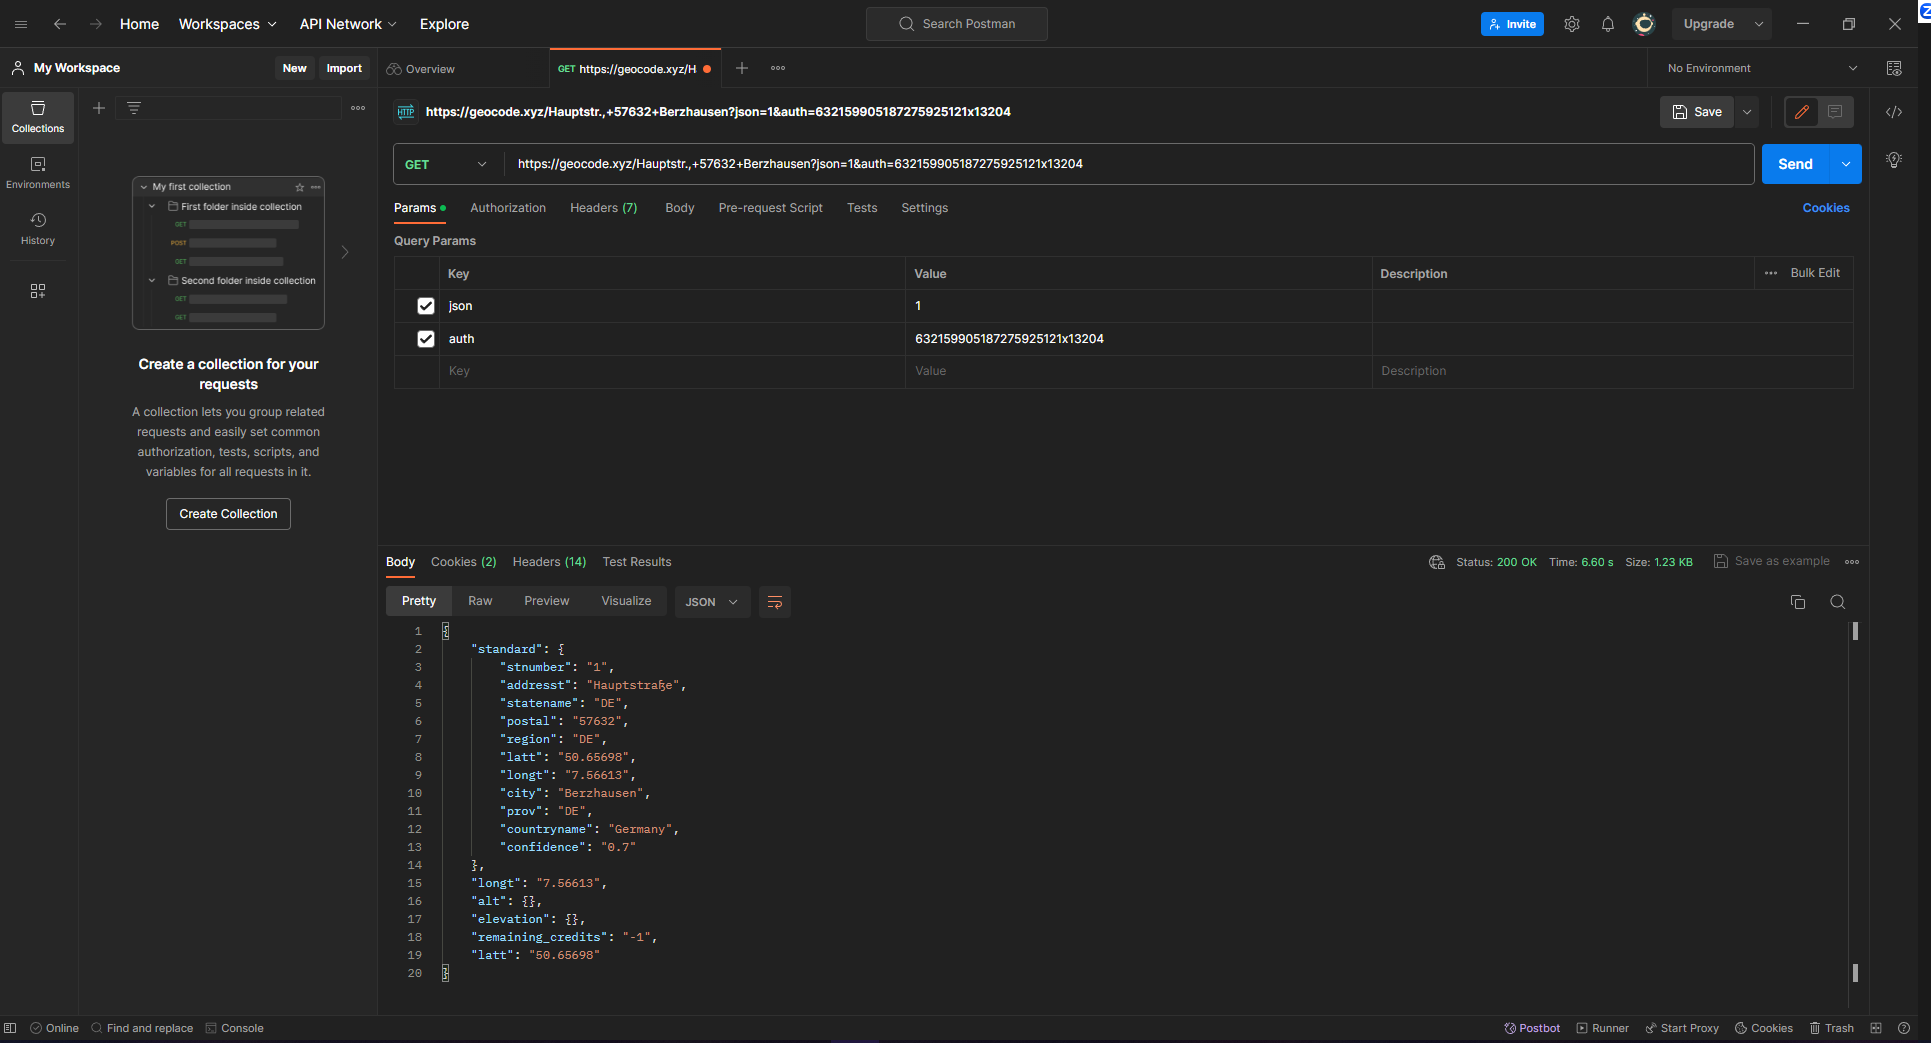